In [ ]:
import pandas as pd
import numpy as np
import json 

In [ ]:
def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

In [ ]:
experiment_folder = './output'
freeze_stages = [1,2,3,4,5]
LRs = [0.01,0.005,0.0025,0.001]
kfold_num = 5

metric_keys = ['bbox/AP', 'bbox/AP50', 'bbox/AP75', 'bbox/APl', 'bbox/APm', 'bbox/APs', 'segm/AP',
               'segm/AP50', 'segm/AP75', 'segm/APl', 'segm/APm', 'segm/APs', 'mask_rcnn/accuracy',
               'mask_rcnn/false_negative', 'mask_rcnn/false_positive']

results_df = pd.DataFrame(columns=['Freeze','LR','KFold','bbox/AP', 'bbox/AP50', 'bbox/AP75', 'bbox/APl', 'bbox/APm', 'bbox/APs', 'segm/AP',
               'segm/AP50', 'segm/AP75', 'segm/APl', 'segm/APm', 'segm/APs', 'mask_rcnn/accuracy',
               'mask_rcnn/false_negative', 'mask_rcnn/false_positive'])

In [ ]:
results_df

In [ ]:
import shutil

In [ ]:
interim_results_df = results_df
kfold_results_df = results_df
k_fold_num = 5
for freeze in freeze_stages:
    for lr in LRs:
        #cfg.SOLVER.BASE_LR = lr
        #cfg.MODEL.BACKBONE.FREEZE_AT = freeze
        for kfold in range(kfold_num):
            print(f"Starting {kfold+1} of {k_fold_num} - Freeze={freeze} ,validation at LR={lr}")

            # Registering and using each training dataset.
            #ann_train = "ann"+str(data_num)+"map"+str(args.class_num)+"train.json"
            #register_coco_instances("taco_kfold_train", {}, args.data_dir + "/" + ann_train, args.data_dir)
            #dataset_kfold_train = DatasetCatalog.get("taco_kfold_train")
            #cfg = get_cfg()
            #cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
            #cfg.DATASETS.TRAIN = ("taco_kfold_train",)

            #trainer = DefaultTrainer(cfg)
            # Train all combinations and save the best AP value for each.
            #trainer.resume_or_load(resume=False)
            #trainer.train()

            # load the information from the metrics.json and save the mAP, AP50, AP75, class_accy, mask_rcnn_accy
            exp_metrics = load_json_arr(experiment_folder + '/metrics.json')


            # loading all metrics in the metrics.json folder
            x = []
            for metric in metric_keys:
                # Getting metric values, getting the avg of last three in list
                x.append(([x[metric] for x in exp_metrics if metric in x][-1]))
                print(metric)
                print([x[metric] for x in exp_metrics if metric in x])
                print('\n')
                print(x)
            input()
            row = pd.DataFrame(x,metric_keys).T
            cross_val_df = pd.concat([results_df,row],0) # Adding metrics

            cross_val_df['Freeze']= freeze
            cross_val_df['LR'] = lr
            cross_val_df['KFold'] = kfold
            
            # Accummulating all results into a single dataframe. 
            interim_results_df = interim_results_df.append(cross_val_df)
            
            # Saving interim results in case it crashes later. 
    
            interim_results_df.to_csv("kfold_results/"+"interim_freeze_"+str(freeze)+"_lr_"+ str(lr)+"_fold_"+str(kfold)+".csv")
            # Reset the metrics file by deleting the entry
            shutil.copyfile(experiment_folder + '/metrics.json',experiment_folder + f'/metrics_FR{str(freeze)}_LR{str(lr)}_KF{str(kfold)}.json')
            # os.remove(experiment_folder + '/metrics.json')
            
        last_5 = interim_results_df.tail(5)   
        kfold_results_df = pd.concat([kfold_results_df,last_5.groupby('Freeze',as_index=False).mean()])
        
        kfold_results_df.to_csv("kfold_results/"+"kfold_freeze_"+str(freeze)+"_lr_"+ str(lr)+".csv")

In [ ]:
# We have 5 interim results after every cross validation, we need the mean of them all. 

In [ ]:
cross_val_df

In [ ]:
interim_results_df

In [ ]:
kfold_results_df

In [ ]:
crossval_results_df

In [ ]:
interim_results_df.groupby('Freeze',as_index=False).mean()

In [ ]:
results_df = results_df.append(interim_results_df.groupby('Freeze',as_index=False).mean())

In [ ]:
computed_results = interim_results_df.head(5)

In [ ]:
computed_results.groupby('Freeze', as_index=False).mean()

In [ ]:
a = cross_val_df
b = pd.concat([a*2,a/4,a*7,a*a])

In [ ]:
b

In [ ]:
exp_metrics = load_json_arr(experiment_folder + '/metrics.json')

In [ ]:
x = []
for metric in metric_keys:
    # Getting metric values, getting the avg of last three in list
    x.append((sum([x[metric] for x in exp_metrics if metric in x][-3:])/3))
row = pd.DataFrame(x,metric_keys).T
cross_val_df = pd.concat([results_df,row],0)

cross_val_df['Freeze']= freeze
cross_val_df['LR'] = lr

In [ ]:
cross_val_df.insert(0,'Freeze',2)

In [ ]:
cross_val_df

In [ ]:
df.to_csv("foo.csv")

# Plotting the metrics

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [69]:
data = pd.read_csv("kfold_2class_results/kfold_freeze_5_lr_0.001.csv")

In [106]:
data1 = pd.read_csv("kfold_1class_results/kfold_freeze_5_lr_0.001.csv")

In [108]:
x = data['Freeze'].to_numpy()
y = data['LR'].to_numpy()
z = data['bbox/AP'].to_numpy()

x1 = data1['Freeze'].to_numpy()
y1 = data1['LR'].to_numpy()
z1 = data1['bbox/AP'].to_numpy()

In [109]:
X,Y = np.meshgrid(x,y)

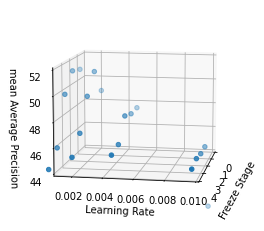

In [120]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1, zdir='z')
ax.set_xlim3d(0, 4)
ax.set_ylim3d(0.001, 0.01)
ax.set_zlim3d(44,52)

ax.view_init(10,10)

ax.set_xlabel('Freeze Stage')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('mean Average Precision')
plt.savefig('scatterplot.png')

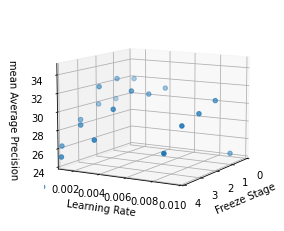

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, zdir='z')
ax.set_xlim3d(0, 4)
ax.set_ylim3d(0.001, 0.01)
ax.set_zlim3d(24,35)

ax.view_init(10,30)

ax.set_xlabel('Freeze Stage')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('mean Average Precision')
plt.savefig('scatterplot.png')

In [59]:
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = pylab.figure()
ax = Axes3D(fig)
ax.set_xlim3d(0, 1000)
ax.set_ylim3d(0,1000)
ax.set_zlim3d(0,1000)

NameError: name 'pylab' is not defined

<Figure size 432x288 with 0 Axes>

In [15]:
Axes3D.plot_trisurf(X,Y,Z)

AttributeError: 'numpy.ndarray' object has no attribute 'has_data'